In [1]:
pip install xgboost

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pyreadstat


import seaborn as sns
import scipy.stats as stats

import plot_function

import importlib


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, average_precision_score
from sklearn.preprocessing import LabelEncoder
importlib.reload(plot_function)

<module 'plot_function' from 'e:\\my_program\\HRS-Dataset\\code\\plot_function.py'>

In [3]:
importlib.reload(plot_function)

<module 'plot_function' from 'e:\\my_program\\HRS-Dataset\\code\\plot_function.py'>

In [4]:
df, meta = pyreadstat.read_sav("Data/randhrs1992_2022v1.sav") 
df.head

<bound method NDFrame.head of             HHIDPN  S1HHIDPN  R1MSTAT  R1MPART  S1BMONTH  S1BYEAR  S1BDATE  \
0           1010.0       0.0      5.0      0.0       NaN      NaN      NaN   
1           2010.0       0.0      7.0      0.0       NaN      NaN      NaN   
2           3010.0    3020.0      1.0      0.0       9.0   1938.0  -7778.0   
3           3020.0    3010.0      1.0      0.0       1.0   1936.0  -8752.0   
4       10001010.0       0.0      8.0      0.0       NaN      NaN      NaN   
...            ...       ...      ...      ...       ...      ...      ...   
45229  923525020.0       NaN      NaN      NaN       NaN      NaN      NaN   
45230  952836010.0       NaN      NaN      NaN       NaN      NaN      NaN   
45231  958361010.0       NaN      NaN      NaN       NaN      NaN      NaN   
45232  959733010.0       NaN      NaN      NaN       NaN      NaN      NaN   
45233  959738010.0       NaN      NaN      NaN       NaN      NaN      NaN   

       S1BFLAG  S1COHBYR  S1HRSAM

In [5]:
Y_vars = ['R3LOST',     #迷路
          'R3WANDER',   #走失
          'R3ALONE',    #是否可以独处
          'R3HALUC',   #是否出现幻觉
          'R3TR20']    #是否出现幻觉

for var in Y_vars:
    print(var in df.columns)

True
True
True
True
True


In [6]:
# 初始化Z列为NaN
df['Z'] = np.nan

# 条件1：前4列任意一个值为1 → Z=1
condition_1 = (df[['R3LOST', 'R3WANDER', 'R3ALONE', 'R3HALUC']] == 1).any(axis=1)
df.loc[condition_1, 'Z'] = 1

# 条件2：前4列全部为NaN或1，且R3TR20不为NaN → Z=0
# 检查前4列是否都是NaN或1
condition_2a = df[['R3LOST', 'R3WANDER', 'R3ALONE', 'R3HALUC']].apply(
    lambda x: x.isin([1, np.nan])).all(axis=1)
# 检查R3TR20不为NaN
condition_2b = df['R3TR20'].notna()
# 组合条件（需同时满足条件1不成立）
condition_2 = ~condition_1 & condition_2a & condition_2b
df.loc[condition_2, 'Z'] = 0

len(set(df['Z']))

27422

e:\my_program\HRS-Dataset\code\plot_function.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_set, x=col, palette="Set2", ax=ax)
e:\my_program\HRS-Dataset\code\plot_function.py:141: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


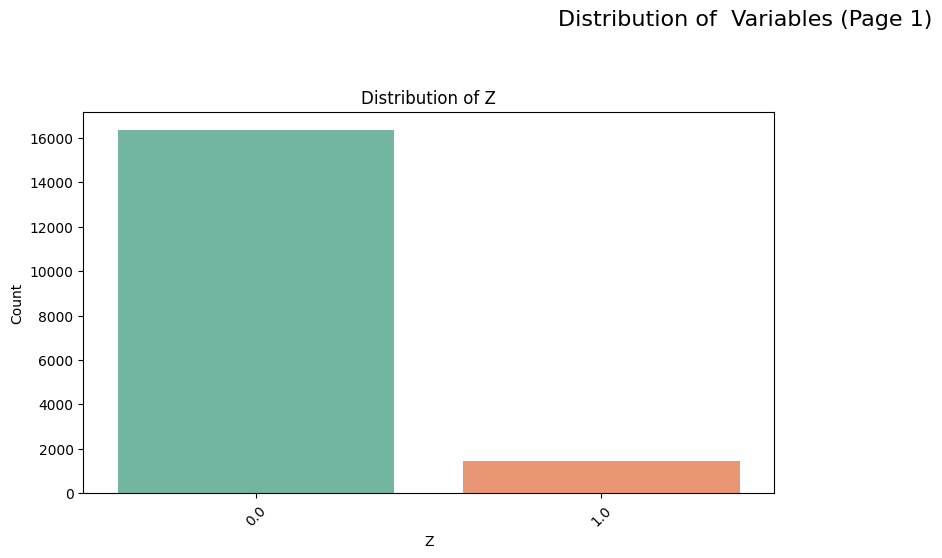

0.08212641742449758


In [7]:
plot_function.plot_histogram(['Z'], df)
Z = df['Z'].dropna()

print(Z.mean())

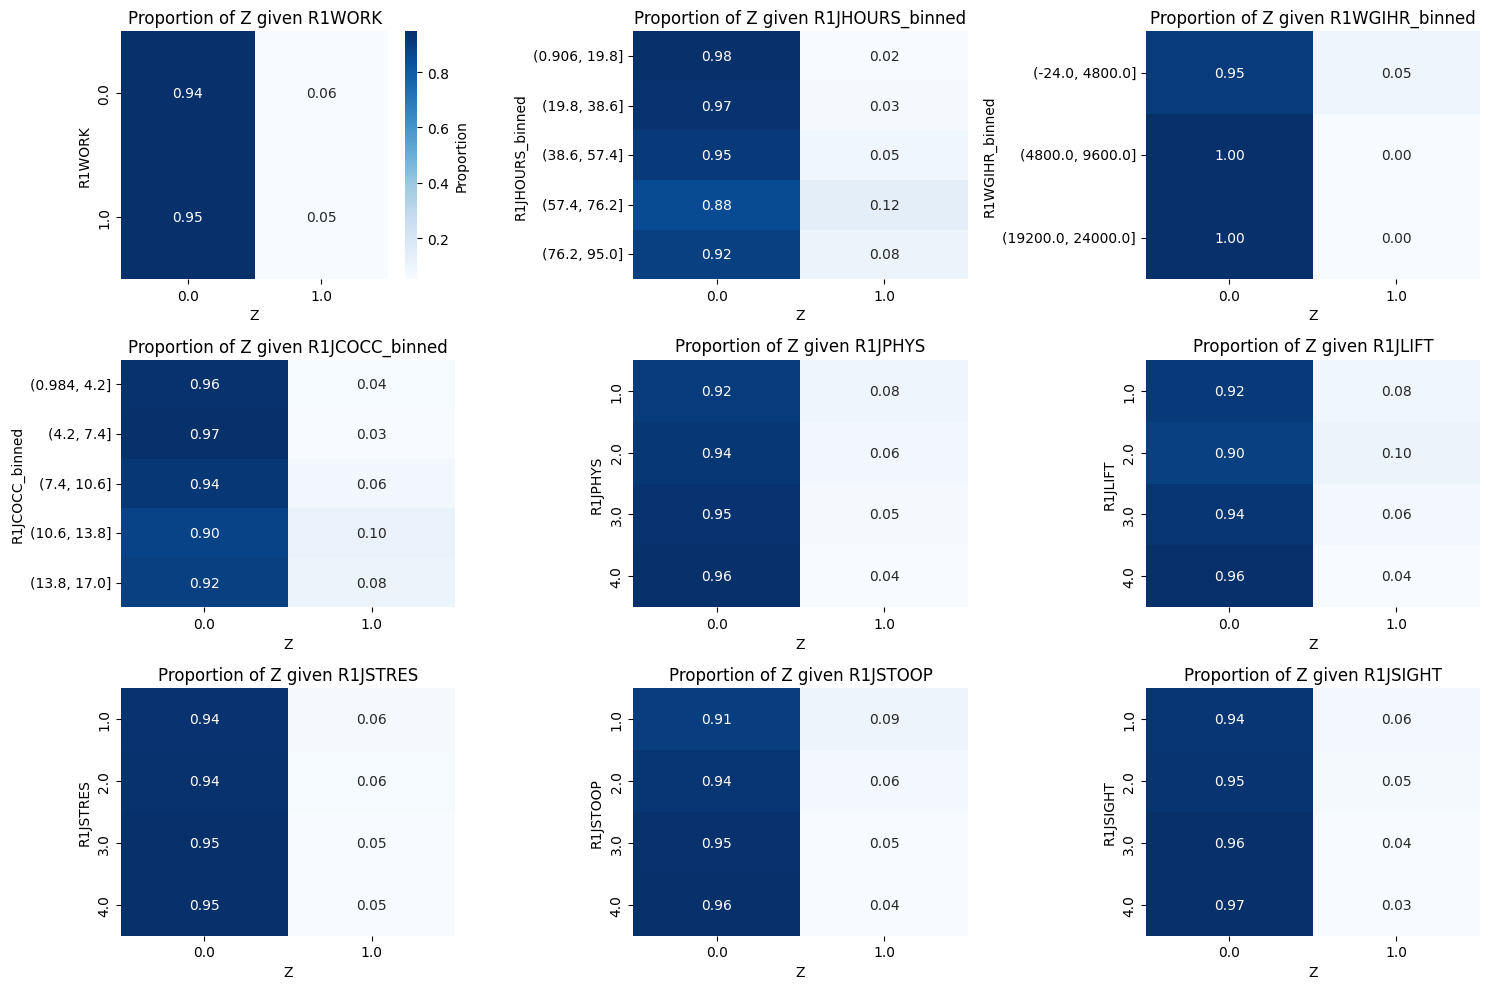

In [8]:
employmentVars = [
    "R1WORK", # W1 R working for pay
    "R1JHOURS", # W1 Hours worked/week main job
    "R1WGIHR", # W1 Imputed Wage Rate-Hrly
    "R1JCOCC", # W1 Current Job Occup/1980 Census
    "R1JPHYS", # W1 Cur job req lots phys effort Categ
    "R1JLIFT", # W1 Cur job req lift heavy loads
    "R1JSTRES", # W1 Cur job involves much stress
    "R1JSTOOP", # W1 Cur job req stoop/kneel/crouch
    "R1JSIGHT", # W1 Cur job req good eyesight
]

# plot_function.plot_box_plot(employmentVars, 'Z',df)


plot_function.plot_cross_heatmaps_with_binning(df, 'Z', employmentVars)

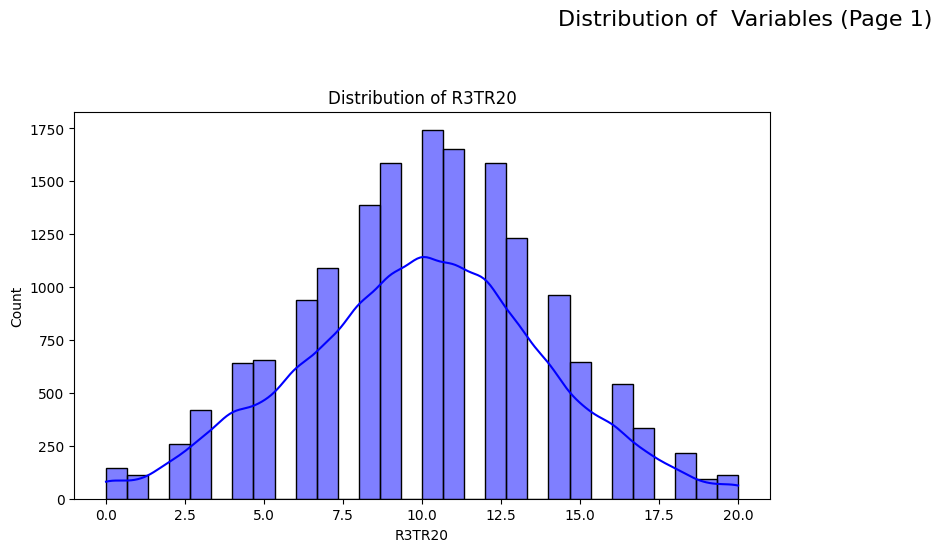

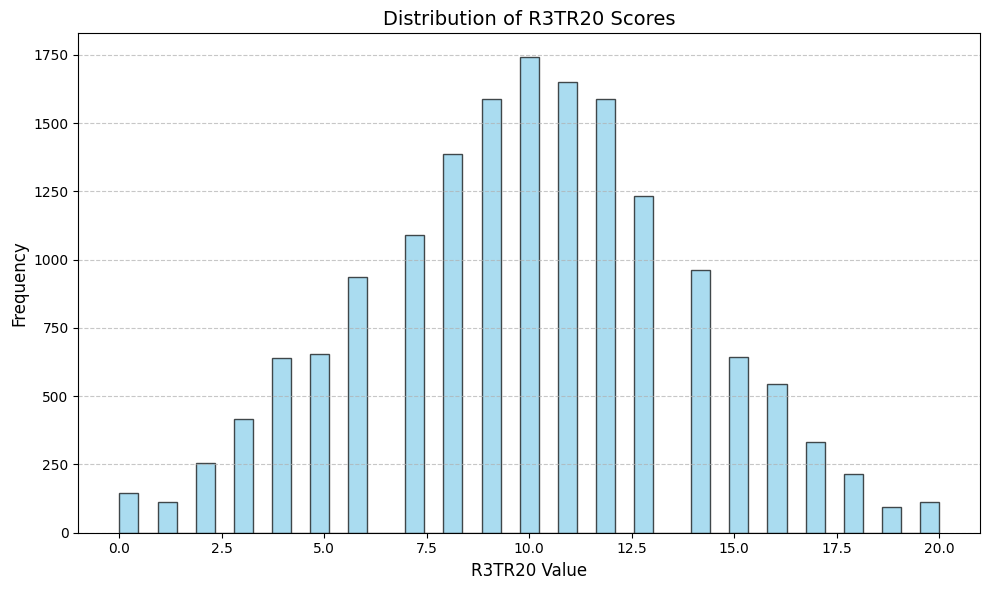

In [9]:
sum(df['R3ALONE']==1)
plot_function.plot_histogram(['R3TR20'],df)

plt.figure(figsize=(10, 6))  # 设置图形大小

# 基础版本（自动分箱）
plt.hist(df['R3TR20'], 
         bins='auto',          # 自动确定分箱数量
         color='skyblue',      # 柱状图颜色
         edgecolor='black',    # 边框颜色
         alpha=0.7)            # 透明度

# 高级版本（手动控制分箱，推荐）
# bins_list = np.linspace(start, stop, num_bins)  # 等距分箱
# 或
# bins_list = [0, 10, 20, 30, 40, 50, 100]       # 自定义分箱边界

# 添加标题和标签
plt.title('Distribution of R3TR20 Scores', fontsize=14)
plt.xlabel('R3TR20 Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # 添加横向网格线

# 显示图表
plt.tight_layout()  # 自动调整布局
plt.show()

e:\my_program\HRS-Dataset\code\plot_function.py:337: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([target_var, f'{var}_bin']).size()
e:\my_program\HRS-Dataset\code\plot_function.py:337: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([target_var, f'{var}_bin']).size()
e:\my_program\HRS-Dataset\code\plot_function.py:337: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group

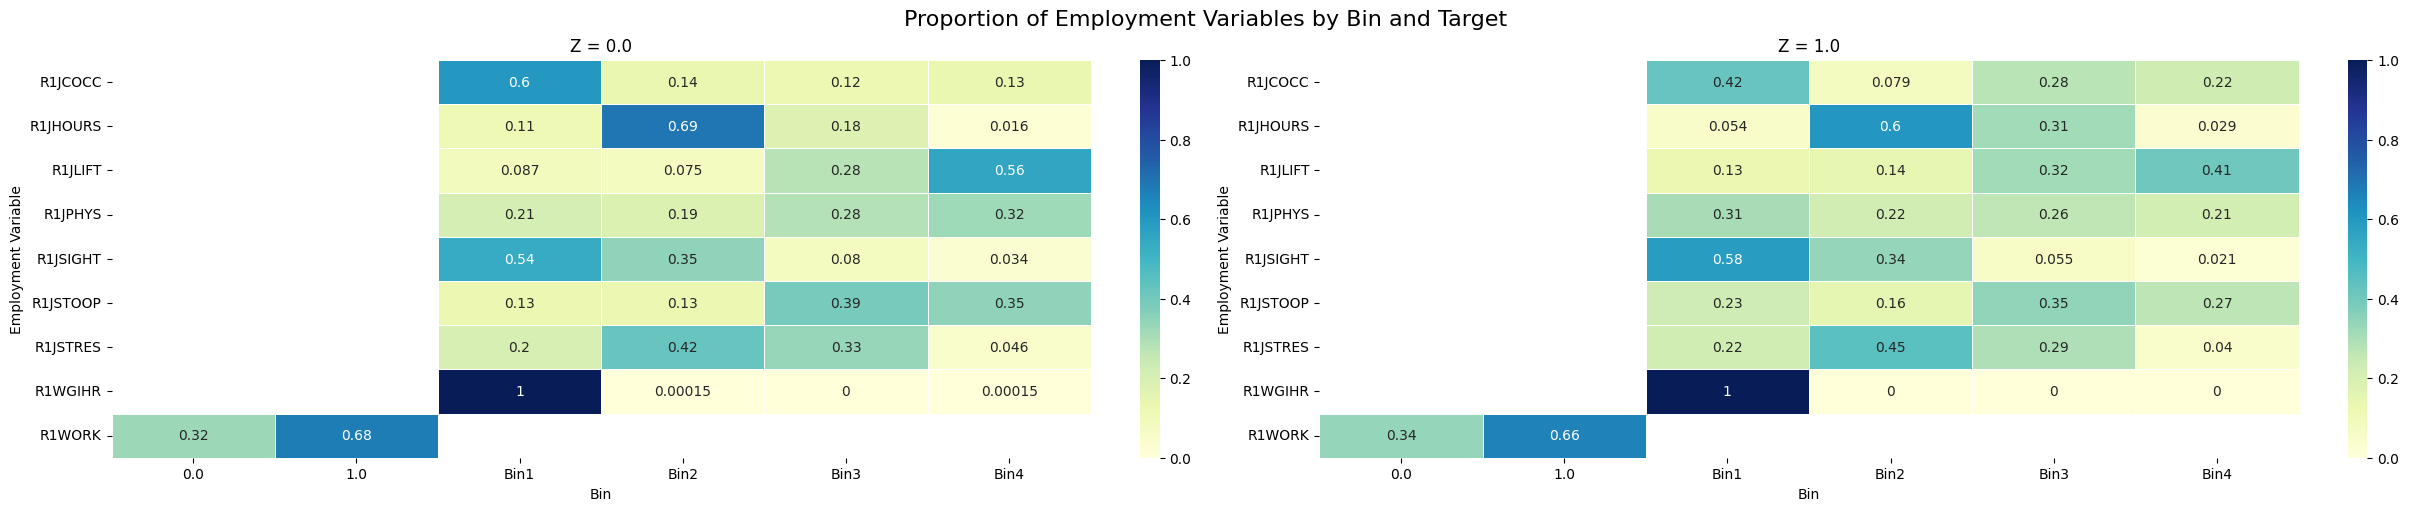

In [10]:
importlib.reload(plot_function)
employmentVars = [
    "R1WORK", # W1 R working for pay
    "R1JHOURS", # W1 Hours worked/week main job
    "R1WGIHR", # W1 Imputed Wage Rate-Hrly
    "R1JCOCC", # W1 Current Job Occup/1980 Census
    "R1JPHYS", # W1 Cur job req lots phys effort Categ
    "R1JLIFT", # W1 Cur job req lift heavy loads
    "R1JSTRES", # W1 Cur job involves much stress
    "R1JSTOOP", # W1 Cur job req stoop/kneel/crouch
    "R1JSIGHT", # W1 Cur job req good eyesight
]
result_df = plot_function.compute_binned_proportions_given_target(df,employment_vars=employmentVars,target_var='Z')
plot_function.plot_heatmap_from_result(result_df, target_var='Z')

e:\my_program\HRS-Dataset\code\plot_function.py:417: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([target_var, f'{var}_bin']).size()
e:\my_program\HRS-Dataset\code\plot_function.py:417: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_temp.groupby([target_var, f'{var}_bin']).size()
e:\my_program\HRS-Dataset\code\plot_function.py:417: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group

      Z  variable   bin  count
0   0.0    R1WORK   1.0   6828
1   0.0    R1WORK   0.0   3286
2   1.0    R1WORK   1.0    383
3   1.0    R1WORK   0.0    196
4   0.0  R1JHOURS  Bin1    769
..  ...       ...   ...    ...
63  0.0  R1JSIGHT  Bin4    228
64  1.0  R1JSIGHT  Bin1    222
65  1.0  R1JSIGHT  Bin2    129
66  1.0  R1JSIGHT  Bin3     21
67  1.0  R1JSIGHT  Bin4      8

[68 rows x 4 columns]


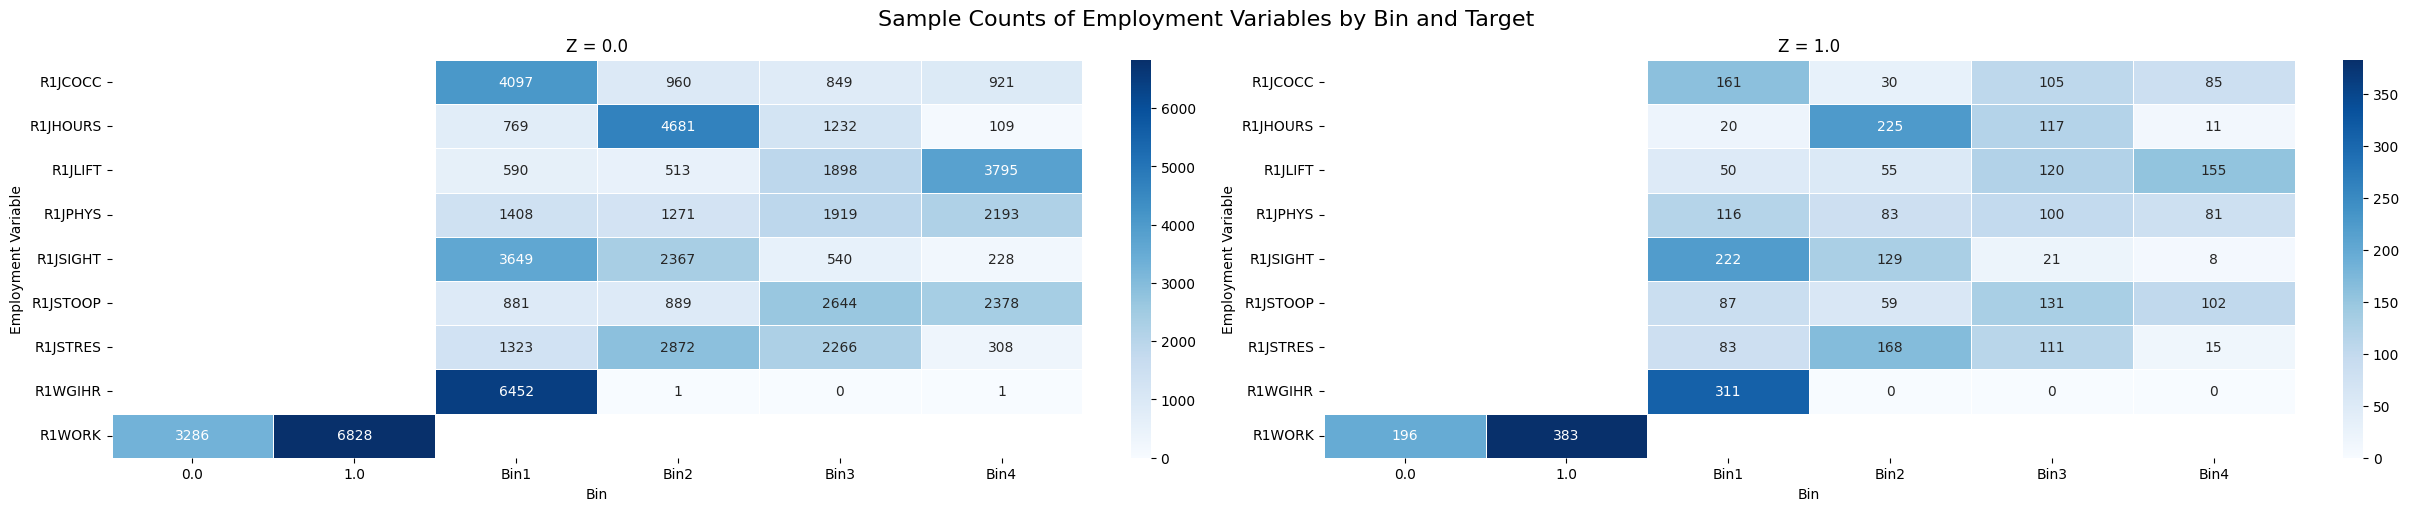

In [11]:
importlib.reload(plot_function)
result_df_counts =  plot_function.compute_binned_counts_given_target(df,employment_vars=employmentVars,target_var='Z')
print(result_df_counts)
plot_function.plot_count_heatmap(result_df_counts,target_var='Z')

In [12]:
set(df['R1JCOCC'].dropna())

{1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0}

In [13]:
[1] + [2]

[1, 2]

In [18]:
employmentVars = [
    "R1WORK", # W1 R working for pay
    "R1JHOURS", # W1 Hours worked/week main job
    "R1WGIHR", # W1 Imputed Wage Rate-Hrly
    "R1JCOCC", # W1 Current Job Occup/1980 Census
    "R1JPHYS", # W1 Cur job req lots phys effort Categ
    "R1JLIFT", # W1 Cur job req lift heavy loads
    "R1JSTRES", # W1 Cur job involves much stress
    "R1JSTOOP", # W1 Cur job req stoop/kneel/crouch
    "R1JSIGHT", # W1 Cur job req good eyesight
]

functionlimitationsVars = [
    "R3HLTHLM", 
    "REBEDRID",
    "R3WALKR", 
    "R3WALKRH", 
    "R3DRESS", 
    "R3DRESSH", 
    "R3BATH", 
    "R3BATHH", 
    "R3EAT", 
    "R3EATH",
    "R3BED", 
    "R3BEDH", 
    "R3TOILT", 
    "R3TOILTH",
    "R3CESD",
    "R3BMI",
    "R3MAP", 
    "R3PHONE", 
    "R3MONEY", 
    "R3MEDS", 
    "R3SHOP",
    "R3MEALS"
]

IncomeVars = [
    "R1IEARN", #  Individual Earnings
    "H1ICAP", # Household Capital Income
    "R1IPENA", # Individual Income from Employer Pension or Annuity
    "R1ISSDI", # Individual Income from Social Security DI or SSI
    "R1ISRET", # Individual Income from Social Security Retirement
    "R1IUNWC", # Individual Unemployment or Workers Compensation
    "R1IGXFR", # Individual Income From Other Government Transfers
    "H1IOTHR", # All Other Household Income
    "H1ITOT", # Total Household Income(Respondent & Spouse)
    "H2IIRAWY1", # IRA Withdrawals
    "H1INPOV", # Poverty Threshold/Whether in Poverty
]

employmentVars = employmentVars + functionlimitationsVars + IncomeVars
# employmentVars = ['R3BMI']

data = df[employmentVars + ['Z']].copy()

# 删除目标变量缺失的行
data = data.dropna(subset=['Z'])

# 分离特征和目标
X = data[employmentVars]
y = data['Z']


# 2. 分析目标变量分布
print(f"目标变量分布:\n{y.value_counts(normalize=True)}")
print(f"少数类占比: {y.mean():.4f}")

# 3. 处理缺失值
# 数值特征用中位数填充
numeric_cols = X.select_dtypes(include=np.number).columns
for col in numeric_cols:
    median_val = X[col].median()
    X[col].fillna(median_val, inplace=True)
    print(f"填充 {col} 缺失值: 使用中位数 {median_val:.2f}")

# 分类特征用众数填充
categorical_cols = X.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    mode_val = X[col].mode()[0]
    X[col].fillna(mode_val, inplace=True)
    print(f"填充 {col} 缺失值: 使用众数 '{mode_val}'")

# 4. 编码分类特征
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# 5. 计算类别权重（关键步骤）
negative_count = np.sum(y == 0)
positive_count = np.sum(y == 1)
scale_pos_weight = negative_count / positive_count
print(f"类别权重 scale_pos_weight = {scale_pos_weight:.2f}")

# 6. 分层抽样划分数据集（保持类别比例）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # 保持训练集和测试集的类别比例
)

# 7. 设置XGBoost参数（针对不平衡二分类优化）
params = {
    'objective': 'binary:logistic',
    'eval_metric': ['aucpr', 'logloss'],  # 使用AUC-PR，对不平衡数据更敏感
    'booster': 'gbtree',
    'eta': 0.05,               # 较小的学习率
    'max_depth': 4,             # 较浅的树防止过拟合
    'subsample': 0.7,           # 行采样
    'colsample_bytree': 0.7,    # 列采样
    'gamma': 0.5,               # 正则化参数
    'lambda': 1.5,              # L2正则化
    'alpha': 0.1,               # L1正则化
    'seed': 42,
    'scale_pos_weight': scale_pos_weight,  # 关键：类别权重
    'nthread': 4
}

# 8. 转换为DMatrix格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 9. 训练模型（使用早停）
num_rounds = 1000
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=50,  # 50轮无改善则停止
    verbose_eval=100
)

# 10. 评估模型（使用多种指标）
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)  # 默认阈值0.5


目标变量分布:
Z
0.0    0.917874
1.0    0.082126
Name: proportion, dtype: float64
少数类占比: 0.0821
填充 R1WORK 缺失值: 使用中位数 1.00
填充 R1JHOURS 缺失值: 使用中位数 40.00
填充 R1WGIHR 缺失值: 使用中位数 10.40
填充 R1JCOCC 缺失值: 使用中位数 4.00
填充 R1JPHYS 缺失值: 使用中位数 3.00
填充 R1JLIFT 缺失值: 使用中位数 4.00
填充 R1JSTRES 缺失值: 使用中位数 2.00
填充 R1JSTOOP 缺失值: 使用中位数 3.00
填充 R1JSIGHT 缺失值: 使用中位数 1.00
填充 R3HLTHLM 缺失值: 使用中位数 0.00
填充 REBEDRID 缺失值: 使用中位数 0.00
填充 R3WALKR 缺失值: 使用中位数 0.00
填充 R3WALKRH 缺失值: 使用中位数 0.00
填充 R3DRESS 缺失值: 使用中位数 0.00
填充 R3DRESSH 缺失值: 使用中位数 0.00
填充 R3BATH 缺失值: 使用中位数 0.00
填充 R3BATHH 缺失值: 使用中位数 0.00
填充 R3EAT 缺失值: 使用中位数 0.00
填充 R3EATH 缺失值: 使用中位数 0.00
填充 R3BED 缺失值: 使用中位数 0.00
填充 R3BEDH 缺失值: 使用中位数 0.00
填充 R3TOILT 缺失值: 使用中位数 0.00
填充 R3TOILTH 缺失值: 使用中位数 0.00
填充 R3CESD 缺失值: 使用中位数 1.00
填充 R3BMI 缺失值: 使用中位数 25.80
填充 R3MAP 缺失值: 使用中位数 0.00
填充 R3PHONE 缺失值: 使用中位数 0.00
填充 R3MONEY 缺失值: 使用中位数 0.00
填充 R3MEDS 缺失值: 使用中位数 0.00
填充 R3SHOP 缺失值: 使用中位数 0.00
填充 R3MEALS 缺失值: 使用中位数 0.00
填充 R1IEARN 缺失值: 使用中位数 13000.00
填充 H1ICAP 缺失值: 使用中位数 0.00
填充 R1IPENA 缺失值: 使用中位

C:\Users\98422\AppData\Local\Temp\ipykernel_19676\3196562995.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(median_val, inplace=True)
C:\Users\98422\AppData\Local\Temp\ipykernel_19676\3196562995.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(median_val, inplace=True)
C:\Users\98422\AppData\Local\Temp\ipy

[100]	train-aucpr:0.73656	train-logloss:0.26145	test-aucpr:0.73613	test-logloss:0.26607
[200]	train-aucpr:0.77456	train-logloss:0.23219	test-aucpr:0.73498	test-logloss:0.24594
[300]	train-aucpr:0.80549	train-logloss:0.21306	test-aucpr:0.73214	test-logloss:0.23479
[400]	train-aucpr:0.83175	train-logloss:0.19613	test-aucpr:0.72992	test-logloss:0.22488
[500]	train-aucpr:0.85419	train-logloss:0.18329	test-aucpr:0.72978	test-logloss:0.21748
[600]	train-aucpr:0.87164	train-logloss:0.17233	test-aucpr:0.72776	test-logloss:0.21222
[700]	train-aucpr:0.88552	train-logloss:0.16279	test-aucpr:0.72691	test-logloss:0.20735
[800]	train-aucpr:0.89853	train-logloss:0.15476	test-aucpr:0.72586	test-logloss:0.20378
[900]	train-aucpr:0.91016	train-logloss:0.14749	test-aucpr:0.72392	test-logloss:0.20201
[999]	train-aucpr:0.91844	train-logloss:0.14094	test-aucpr:0.72090	test-logloss:0.19922



模型评估结果:
准确率: 0.8858
精确率: 0.4056
召回率: 0.8362
F1分数: 0.5463
ROC AUC: 0.9553
PR AUC: 0.7212


c:\Users\98422\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\98422\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\98422\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\98422\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\98422\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\98422\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWa

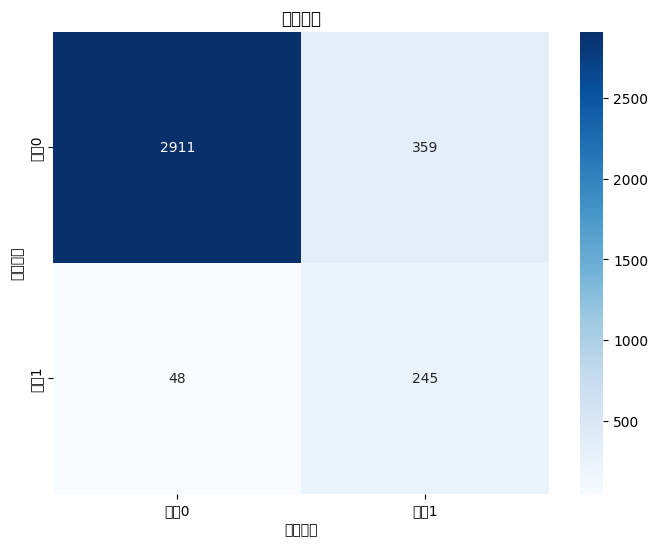

In [19]:
# 10. 评估模型（使用多种指标）
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)  # 默认阈值0.5


# 计算各种评估指标
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
pr_auc = average_precision_score(y_test, y_pred_prob)  # 精确率-召回率曲线下面积


print(f"\n模型评估结果:")
print(f"准确率: {accuracy:.4f}")
print(f"精确率: {precision:.4f}")
print(f"召回率: {recall:.4f}")
print(f"F1分数: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"PR AUC: {pr_auc:.4f}")

# 11. 绘制混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['预测0', '预测1'], 
            yticklabels=['实际0', '实际1'])
plt.title('混淆矩阵')
plt.ylabel('真实标签')
plt.xlabel('预测标签')
plt.show()


最佳阈值: 0.8184, 对应F1分数: 0.6288

特征重要性排序 (基于权重):
R3BMI: 1921.0
H1ITOT: 1278.0
R1WGIHR: 824.0
R1IEARN: 754.0
H1ICAP: 624.0
R1JHOURS: 510.0
R1JCOCC: 470.0
H2IIRAWY1: 352.0
R1IPENA: 292.0
R3MAP: 278.0
R3CESD: 267.0
R1ISRET: 261.0
R3SHOP: 236.0
R3MEALS: 223.0
R3MONEY: 196.0
R3MEDS: 189.0
H1IOTHR: 176.0
R1JSTRES: 175.0
R1JPHYS: 172.0
R1IGXFR: 171.0
R1ISSDI: 165.0
R1JSIGHT: 159.0
REBEDRID: 159.0
R1JLIFT: 148.0
R1JSTOOP: 128.0
R3PHONE: 115.0
R3HLTHLM: 113.0
R1IUNWC: 112.0
R3WALKR: 105.0
R3DRESS: 85.0
R1WORK: 77.0
R3BED: 77.0
R3TOILT: 65.0
R3BEDH: 58.0
R3BATHH: 56.0
R3EATH: 46.0
R3EAT: 45.0
H1INPOV: 40.0
R3DRESSH: 38.0
R3BATH: 29.0
R3WALKRH: 18.0
R3TOILTH: 8.0


<Figure size 1000x600 with 0 Axes>

c:\Users\98422\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\98422\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\98422\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\98422\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\98422\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaV

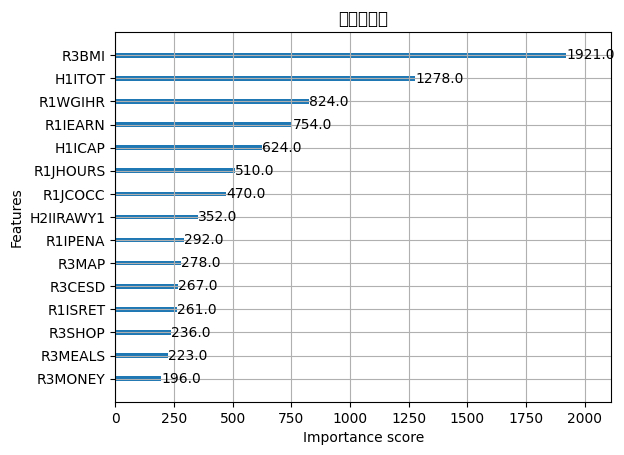


模型已保存为 'xgboost_imbalanced_model.json'


In [20]:
# 12. 寻找最佳阈值（最大化F1分数）
thresholds = np.linspace(0.1, 0.9, 50)
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (y_pred_prob > thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

best_thresh = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"\n最佳阈值: {best_thresh:.4f}, 对应F1分数: {best_f1:.4f}")

# 使用最佳阈值重新预测
y_pred_best = (y_pred_prob > best_thresh).astype(int)

# 13. 特征重要性分析
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

print("\n特征重要性排序 (基于权重):")
for feat, imp in sorted_importance:
    print(f"{feat}: {imp}")

plt.figure(figsize=(10, 6))
xgb.plot_importance(model, importance_type='weight', max_num_features=15)
plt.title('特征重要性')
plt.show()

# 14. 保存模型
model.save_model('xgboost_imbalanced_model.json')
print("\n模型已保存为 'xgboost_imbalanced_model.json'")

# 15. 使用最佳阈值进行预测的函数
def predict_with_optimal_threshold(model, X, threshold=0.5):
    """使用最佳阈值进行预测"""
    dmatrix = xgb.DMatrix(X)
    probabilities = model.predict(dmatrix)
    return (probabilities > threshold).astype(int)

In [21]:
thresholds = np.linspace(0.1, 0.9, 50)
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (y_pred_prob > thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

best_thresh = thresholds[np.argmax(f1_scores)]
print(f"最佳阈值: {best_thresh:.4f}")

最佳阈值: 0.8184



使用最佳阈值 0.8000 后的评估结果:
准确率: 0.9419
精确率: 0.6667
召回率: 0.5870
F1分数: 0.6243
ROC AUC: 0.9553 (不变)
PR AUC: 0.7212 (不变)


c:\Users\98422\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\98422\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\98422\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\98422\miniconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 38469 (\N{CJK UNIFIED IDEOGRAPH-9645}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\98422\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\98422\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWa

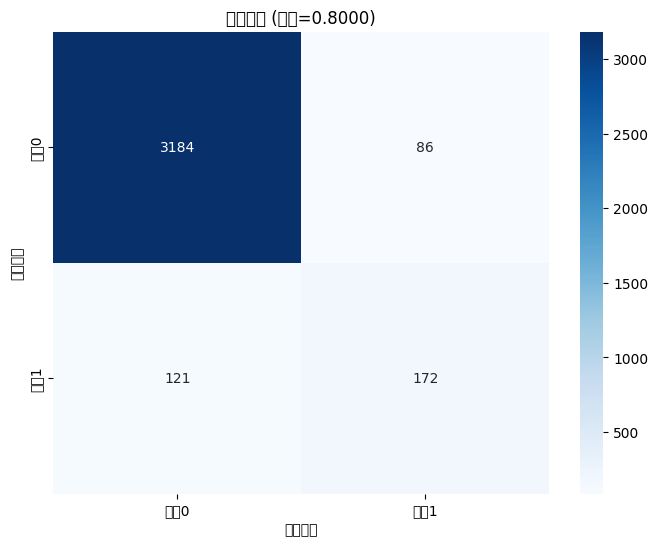

In [24]:
# 使用最佳阈值重新预测
# best_thresh = 0.8184
best_thresh = 0.8
y_pred_best = (y_pred_prob > best_thresh).astype(int)

# 重新计算评估指标
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_prob)  # ROC AUC不变
pr_auc_best = average_precision_score(y_test, y_pred_prob)  # PR AUC不变

print(f"\n使用最佳阈值 {best_thresh:.4f} 后的评估结果:")
print(f"准确率: {accuracy_best:.4f}")
print(f"精确率: {precision_best:.4f}")
print(f"召回率: {recall_best:.4f}")
print(f"F1分数: {f1_best:.4f}")
print(f"ROC AUC: {roc_auc_best:.4f} (不变)")
print(f"PR AUC: {pr_auc_best:.4f} (不变)")

# 绘制新的混淆矩阵
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['预测0', '预测1'], 
            yticklabels=['实际0', '实际1'])
plt.title(f'混淆矩阵 (阈值={best_thresh:.4f})')
plt.ylabel('真实标签')
plt.xlabel('预测标签')
plt.show()
